# Datrix Classification Assignment

In [1]:
import pandas as pd
import numpy as np
# Let's see how the numeric data is distributed.
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

# Pre Processing

In [2]:
data_path="../input/bank-marketing/bank-additional-full.csv"
df=pd.read_csv(data_path,sep=";")

## Features

* Age (numeric)
* Job : type of job (categorical: ‘admin.’, ‘blue-collar’, ‘entrepreneur’, ‘housemaid’, ‘management’, ‘retired’, ‘self-employed’, ‘services’, ‘student’, ‘technician’, ‘unemployed’, ‘unknown’)
* Marital : marital status (categorical: ‘divorced’, ‘married’, ‘single’, ‘unknown’ ; note: ‘divorced’ means divorced or widowed)
* Education (categorical: ‘basic.4y’, ‘basic.6y’, ‘basic.9y’, ‘high.school’, ‘illiterate’, ‘professional.course’, ‘university.degree’, ‘unknown’)
* Default: has credit in default? (categorical: ‘no’, ‘yes’, ‘unknown’)
* Housing: has housing loan? (categorical: ‘no’, ‘yes’, ‘unknown’)
* Loan: has personal loan? (categorical: ‘no’, ‘yes’, ‘unknown’)

* Contact: contact communication type (categorical: ‘cellular’,‘telephone’)
* Month: last contact month of year (categorical: ‘jan’, ‘feb’, ‘mar’, …, ‘nov’, ‘dec’)
* Day_of_week: last contact day of the week (categorical: ‘mon’,‘tue’,‘wed’,‘thu’,‘fri’)
* Duration: last contact duration, in seconds (numeric).

* Campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
* Pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
* Previous: number of contacts performed before this campaign and for this client (numeric)
* Poutcome: outcome of the previous marketing campaign (categorical: ‘failure’,‘nonexistent’,‘success’)

* Emp.var.rate: employment variation rate - quarterly indicator (numeric)
* Cons.price.idx: consumer price index - monthly indicator (numeric)
* Cons.conf.idx: consumer confidence index - monthly indicator (numeric)
* Euribor3m: euribor 3 month rate - daily indicator (numeric)
* Nr.employed: number of employees - quarterly indicator (numeric)
Output variable (desired target):

* y: has the client subscribed a term deposit? (binary: ‘yes’, ‘no’)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [4]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [5]:
#Checking out the categories and their respective counts in each feature
print("Job:",df.job.value_counts(),sep = '\n')
print("-"*40)
print("Marital:",df.marital.value_counts(),sep = '\n')
print("-"*40)
print("Education:",df.education.value_counts(),sep = '\n')
print("-"*40)
print("Default:",df.default.value_counts(),sep = '\n')
print("-"*40)
print("Housing loan:",df.housing.value_counts(),sep = '\n')
print("-"*40)
print("Personal loan:",df.loan.value_counts(),sep = '\n')
print("-"*40)
print("Contact:",df.contact.value_counts(),sep = '\n')
print("-"*40)
print("Month:",df.month.value_counts(),sep = '\n')
print("-"*40)
print("Day:",df.day_of_week.value_counts(),sep = '\n')
print("-"*40)
print("Previous outcome:",df.poutcome.value_counts(),sep = '\n')
print("-"*40)
print("Outcome of this campaign:",df.y.value_counts(),sep = '\n')
print("-"*40)

Job:
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64
----------------------------------------
Marital:
married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64
----------------------------------------
Education:
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64
----------------------------------------
Default:
no         32588
unknown     8597
yes            3
Name: default, dtype: int64
----------------------------------------
Housing loan:
yes        21576
no         18622
unknown      

## Dealing with Missing Values

Firstly I start to work with missing values for this kind of project. In the dataset there is no missing values but there are some "Unknown" values which are actually missing values for us. So I start to pre-processing by removing this values from dataset.

In [6]:
for column in df.columns:
    df[column].replace('unknown', np.nan, inplace=True)
    df.dropna(inplace=True)

In [7]:
df.reset_index(inplace=True,drop=True)
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30483,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
30484,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
30485,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
30486,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


Since default feature is mostly "no" which is highly imbalanced, I also drop this feature.

In [8]:
df.default.value_counts()

no     30485
yes        3
Name: default, dtype: int64

In [9]:
df.drop("default",inplace=True,axis=1)

In [10]:
df.columns.values

array(['age', 'job', 'marital', 'education', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'], dtype=object)

## Exploratory Data Analysis and Pre-Processing

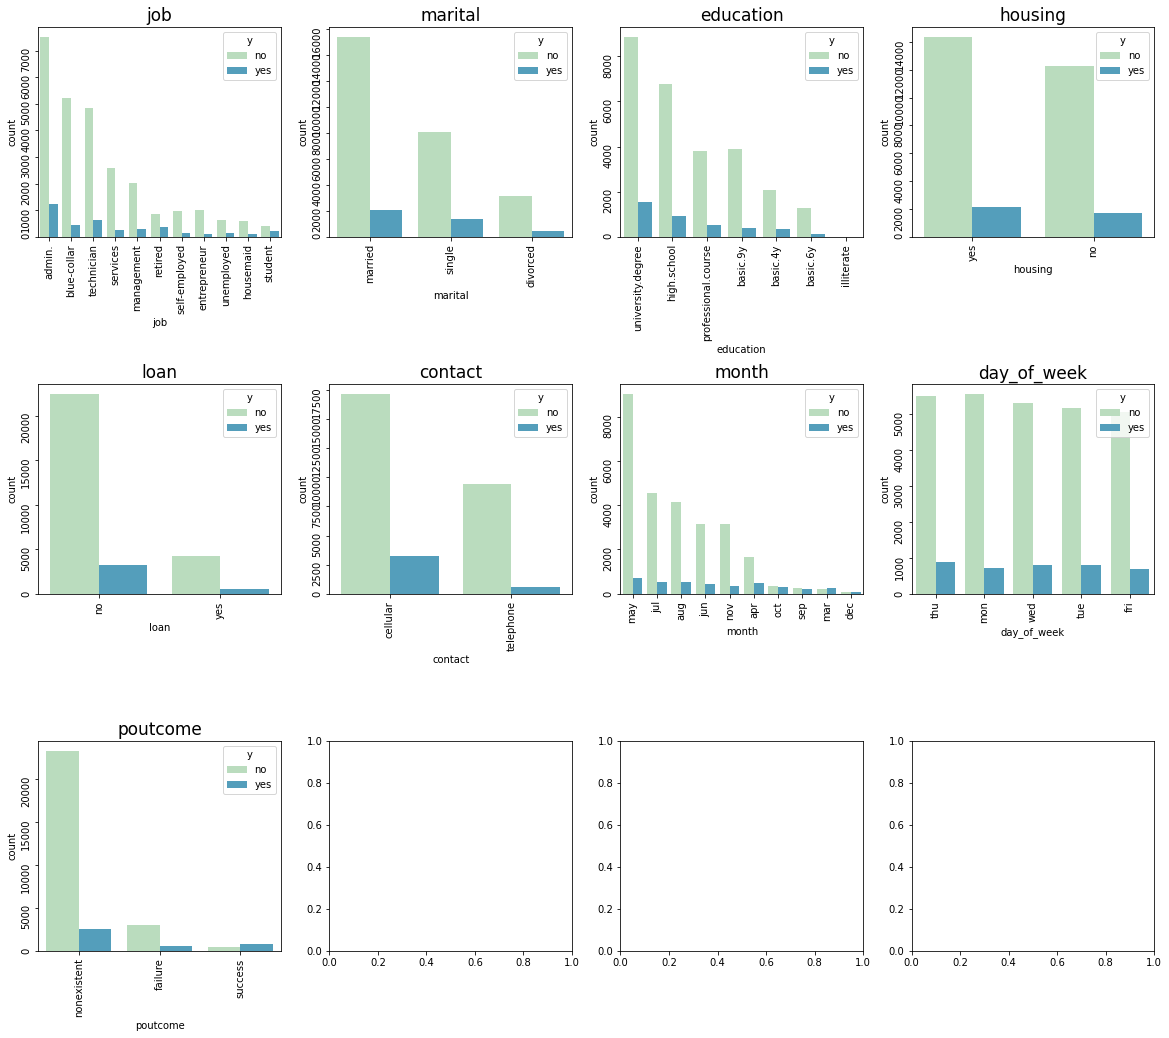

In [11]:
fig, ax = plt.subplots(3,4, figsize=(20,17))
cat = df.select_dtypes('object').columns.to_list()
cat = cat[:-1]
ax = ax.ravel()
position = 0
for i in cat:
    
    order = df[i].value_counts().index
    sns.countplot(data=df, x=i, ax=ax[position], hue='y', palette='GnBu', order=order)
    ax[position].tick_params(labelrotation=90)
    ax[position].set_title(i, fontdict={'fontsize':17})
    
    position += 1

plt.subplots_adjust(hspace=0.7)

plt.show()

Clearly, the data is imbalanced. 

For the education feature, there are some similar values like basic.9y, basic.6y and basic.4y. I convert them to "middle.shool"

In [12]:
lst=['basic.9y','basic.6y','basic.4y']
for i in lst:
    df.loc[df['education'] == i, 'education'] = "middle.school"

df['education'].value_counts()

university.degree      10412
middle.school           8045
high.school             7699
professional.course     4321
illiterate                11
Name: education, dtype: int64

* In poutcome feature, there is also a problem with missing value, but since it is too much data, I convert them to 0.

In [13]:
df.poutcome.value_counts()

nonexistent    25836
failure         3461
success         1191
Name: poutcome, dtype: int64

In [14]:
# binary if were was an outcome of marketing campane
df.poutcome = df.poutcome.map({'nonexistent':0, 'failure':0, 'success':1}).astype('uint8') 

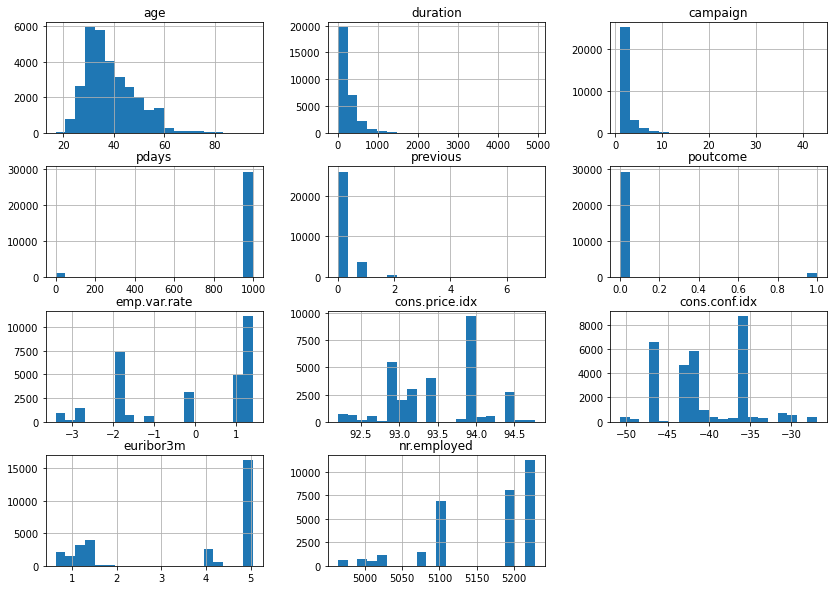

In [15]:
df.hist(bins=20, figsize=(14,10))
plt.show()

In [16]:
df.describe()

,age,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,30488.000000,30488.000000,30488.000000,30488.000000,30488.000000,30488.000000,30488.000000,30488.000000,30488.000000,30488.000000,30488.000000
mean,39.030012,259.484092,2.521451,956.332295,0.194273,0.039065,-0.071510,93.523311,-40.602263,3.459938,5160.813409
std,10.333529,261.714262,2.720150,201.373292,0.522788,0.193752,1.610399,0.585374,4.789249,1.777231,75.158065
min,17.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,31.000000,103.000000,1.000000,999.000000,0.000000,0.000000,-1.800000,93.075000,-42.700000,1.313000,5099.100000
50%,37.000000,181.000000,2.000000,999.000000,0.000000,0.000000,1.100000,93.444000,-41.800000,4.856000,5191.000000
75%,45.000000,321.000000,3.000000,999.000000,0.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,95.000000,4918.000000,43.000000,999.000000,7.000000,1.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


* Age range, from 18 to 95 years old. However, a majority of age of 30s and 40s (33 to 48 years old fall within the 25th to 75th percentiles). The distribution of customer age is fairly normal with a small standard deviation.
* 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m' and 'nr.employed' don't show any apparent distribution

There is also a issue in pdays feature. if the value is 999, then it will be replaced with a 0 which means that the client was not previously contacted.

In [17]:
df.pdays.value_counts()

999    29178
3        381
6        363
4        102
2         53
9         53
7         50
12        50
5         43
10        40
13        33
11        25
15        22
1         21
14        17
0         14
8         13
16         8
17         6
18         5
22         3
19         3
21         2
25         1
26         1
27         1
Name: pdays, dtype: int64

In [18]:
df.loc[df['pdays'] == 999, 'pdays'] = 0

In [19]:
df.pdays.value_counts()

0     29192
3       381
6       363
4       102
2        53
9        53
7        50
12       50
5        43
10       40
13       33
11       25
15       22
1        21
14       17
8        13
16        8
17        6
18        5
22        3
19        3
21        2
25        1
26        1
27        1
Name: pdays, dtype: int64

In [20]:
df.previous.value_counts()

0    25836
1     3752
2      633
3      190
4       56
5       16
6        4
7        1
Name: previous, dtype: int64

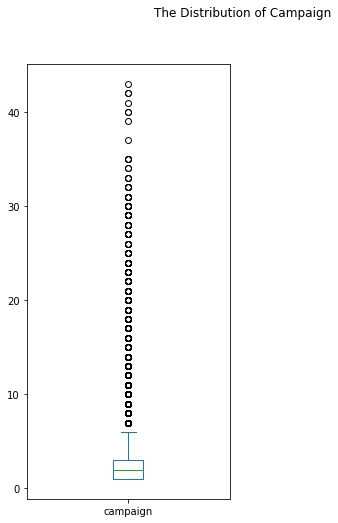

In [21]:
df[['campaign']].plot(kind = 'box', 
                                              figsize = (8,8),
                                              subplots = True, layout = (1,2),
                                              sharex = False, sharey = False,
                                              title='The Distribution of Campaign')
plt.show()

* Most clients have been reached by the bank for one to three times, which is reasonable. However, some clients have been contacted by as high as 58 times, which is not normal. 

In [22]:
# Convert target variable into numeric
df.y = df.y.map({'no':0, 'yes':1}).astype('uint8')

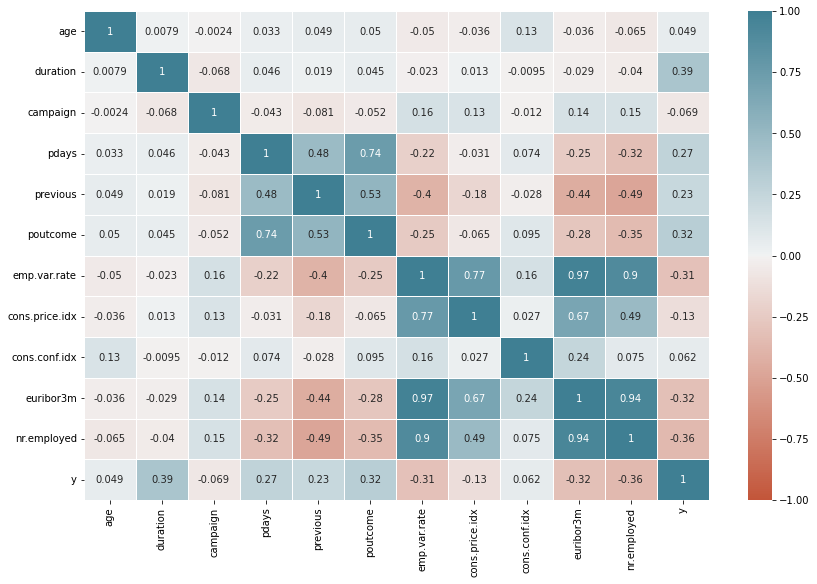

In [23]:
fig, ax = plt.subplots(figsize=(14,9))
sns.heatmap(df.corr(), vmin=-1, vmax=1, cmap=sns.diverging_palette(20, 220, as_cmap=True), annot=True, linewidths=.5)
plt.show()

* Duration highly affects the output target (e.g., if duration=0 then y=‘no’). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

Since pdays and previous features are correlated, I convert previous feature to categorical feature.

In [24]:
df.previous = df.previous.apply(lambda x: 1 if x > 0 else 0).astype('uint8') 

In [25]:
df.head()

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,middle.school,no,no,telephone,may,mon,261,1,0,0,0,1.1,93.994,-36.4,4.857,5191.0,0
1,37,services,married,high.school,yes,no,telephone,may,mon,226,1,0,0,0,1.1,93.994,-36.4,4.857,5191.0,0
2,40,admin.,married,middle.school,no,no,telephone,may,mon,151,1,0,0,0,1.1,93.994,-36.4,4.857,5191.0,0
3,56,services,married,high.school,no,yes,telephone,may,mon,307,1,0,0,0,1.1,93.994,-36.4,4.857,5191.0,0
4,59,admin.,married,professional.course,no,no,telephone,may,mon,139,1,0,0,0,1.1,93.994,-36.4,4.857,5191.0,0


* Encoding the remaining features

In [26]:
le = preprocessing.LabelEncoder()
objects = ["job","marital","education","housing","loan","contact","month","day_of_week"]
for i in objects:  
    df[i] = le.fit_transform(df[i])

In [27]:
df.head()

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,2,0,0,1,6,1,261,1,0,0,0,1.1,93.994,-36.4,4.857,5191.0,0
1,37,7,1,0,1,0,1,6,1,226,1,0,0,0,1.1,93.994,-36.4,4.857,5191.0,0
2,40,0,1,2,0,0,1,6,1,151,1,0,0,0,1.1,93.994,-36.4,4.857,5191.0,0
3,56,7,1,0,0,1,1,6,1,307,1,0,0,0,1.1,93.994,-36.4,4.857,5191.0,0
4,59,0,1,3,0,0,1,6,1,139,1,0,0,0,1.1,93.994,-36.4,4.857,5191.0,0


# Modelling

## Baseline Modelling without Feature Selection

* A decision tree is a simple, decision making-diagram.
* Random forests are a large number of trees, combined (using averages or “majority rules”) at the end of the process.
* Gradient boosting machines also combine decision trees, but start the combining process at the beginning, instead of at the end.

Both RF and GBM are ensemble methods, meaning you build a classifier out a big number of smaller classifiers. Now the fundamental difference lies on the method used:

* RF uses decision trees, which are very prone to overfitting. In order to achieve higher accuracy, RF decides to create a large number of them based on bagging. The basic idea is to resample the data over and over and for each sample train a new classifier. Different classifiers overfit the data in a different way, and through voting those differences are averaged out.
* GBM is a boosting method, which builds on weak classifiers. The idea is to add a classifier at a time, so that the next classifier is trained to improve the already trained ensemble. Notice that for RF each iteration the classifier is trained independently from the rest.

Boosting model is popular these days and Xgboost and LightGBM are most used ones.
* In XGBoost, trees grow depth-wise while in LightGBM, trees grow leaf-wise which is the fundamental difference between the two frameworks.

In [28]:
#Data Splitting Libraries
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
#Classification Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

In [29]:
X = df.iloc[:,df.columns != 'y']
y = df.y
print("X Columns: ",list(X.columns))

X Columns:  ['age', 'job', 'marital', 'education', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


In [30]:
def ML_training(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)
    
    log_lm = LogisticRegression()
    log_lm.fit(X_train, y_train)
    logy_pred = log_lm.predict(X_test)
    acclr = accuracy_score(y_test, logy_pred)*100
    logquestions = pd.DataFrame({'features': X.columns,'Coef': (log_lm.coef_[0])*100})
    logquestions = logquestions.sort_values(by='Coef', ascending=False)
    ##############################
    dtree=DecisionTreeClassifier()
    dtree.fit(X_train, y_train)
    dtreey_pred = dtree.predict(X_test)
    accdtree = accuracy_score(y_test, dtreey_pred)*100
    dtreequestions = importance(dtree,X)
    ##############################
    rf = RandomForestClassifier(random_state=42)
    rf.fit(X_train, y_train)
    rfy_pred = rf.predict(X_test)
    accrf = accuracy_score(y_test, rfy_pred)*100
    accquestions = importance(rf,X)
    #############################
    gbrt = GradientBoostingClassifier(random_state=42)
    gbrt.fit(X_train, y_train)
    gbrt_pred=gbrt.predict(X_test)
    accgbrt = accuracy_score(y_test, gbrt_pred)*100
    gbrtaccquestions = importance(gbrt,X)
    #############################
    knn = KNeighborsClassifier()
    knn.fit(X_train, y_train)
    knn_pred=knn.predict(X_test)
    knngbrt = accuracy_score(y_test, knn_pred)*100
    #knnaccquestions = importance(knn)

    # Reporting
    print("Logistic Regression Report in test set")
    print(classification_report(y_test, logy_pred))
    print(confusion_matrix(y_test,logy_pred))
    print(logquestions)
    print("------------------------------------------------------")
    print("Decision Tree Report in test set")
    print(classification_report(y_test, dtreey_pred))
    print(confusion_matrix(y_test,dtreey_pred))
    print(dtreequestions)
    print("------------------------------------------------------")
    print("Random Forest Report in test set")
    print(classification_report(y_test, rfy_pred))
    print(confusion_matrix(y_test,rfy_pred))
    print(accquestions)
    print("------------------------------------------------------")
    print("Gradient Boosting in test set")
    print(classification_report(y_test, gbrt_pred))
    print(confusion_matrix(y_test,gbrt_pred))
    print(gbrtaccquestions)
    print("------------------------------------------------------")
    print("K Neighbors in test set")
    print(classification_report(y_test, knn_pred))
    print(confusion_matrix(y_test,knn_pred))
    #print(knnaccquestions)
    print("------------------------------------------------------")

In [31]:
def importance(model,X):
    questions = pd.DataFrame({'features': X.columns,'importance': (model.feature_importances_)*100})
    questions.sort_values(by='importance', ascending=False)
    questions = questions.sort_values(by='importance', ascending=False)
    return questions

In [32]:
ML_training(X,y)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Logistic Regression Report in test set
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      5350
           1       0.64      0.37      0.47       748

    accuracy                           0.90      6098
   macro avg       0.78      0.67      0.71      6098
weighted avg       0.88      0.90      0.88      6098

[[5191  159]
 [ 470  278]]
          features       Coef
15  cons.price.idx  24.235152
11           pdays  17.184219
3        education   5.213851
16   cons.conf.idx   4.536049
13        poutcome   4.253580
2          marital   3.322113
12        previous   2.942921
8      day_of_week   2.758412
4          housing   0.492589
9         duration   0.452608
0              age   0.254296
5             loan  -0.293641
1              job  -0.414387
18     nr.employed  -0.459641
6          contact  -4.293832
10        campaign  -6.392883
7            month  -7.653045
14    emp.var.rate -25.812411
17       euribor3m -28.228825
-------

* As I already seen in correlation plot, duration feature is highly correlated and has to be removed from modelling. 
* As you can see models can not able to predict "yes" value in target feature, it could be about imbalanced dataset or about some features like duration.

## Balanced Dataset without Feature Selection

In [33]:
print("Unbalanced Data shape", len(df))
datano = df[df.y == 0]
datayes = df[df.y == 1]
balanced_df = pd.concat([datano.sample(len(datayes), random_state=5), datayes])
print("Balanced data shape:", len(balanced_df))

Unbalanced Data shape 30488
Balanced data shape: 7718


In [34]:
balanced_df.y.value_counts()

0    3859
1    3859
Name: y, dtype: int64

In [35]:
balanced_df.reset_index(inplace=True,drop=True)

In [36]:
X_balanced = balanced_df.iloc[:,balanced_df.columns != 'y']
y_balanced = balanced_df.y
print("X Columns: ",list(X_balanced.columns))

X Columns:  ['age', 'job', 'marital', 'education', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


In [37]:
ML_training(X_balanced,y_balanced)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Logistic Regression Report in test set
              precision    recall  f1-score   support

           0       0.85      0.83      0.84       766
           1       0.84      0.86      0.85       778

    accuracy                           0.85      1544
   macro avg       0.85      0.85      0.85      1544
weighted avg       0.85      0.85      0.85      1544

[[638 128]
 [109 669]]
          features       Coef
15  cons.price.idx  27.446007
11           pdays  21.484307
3        education   9.424589
16   cons.conf.idx   4.700273
13        poutcome   4.555353
2          marital   4.226593
8      day_of_week   3.460478
12        previous   2.790423
1              job   2.000256
4          housing   1.103146
9         duration   0.641387
5             loan  -0.044744
0              age  -0.362112
18     nr.employed  -0.490598
6          contact  -5.036298
10        campaign  -7.349554
7            month  -8.245828
14    emp.var.rate -33.084206
17       euribor3m -33.683408
-----------

* As you can see in the balanced dataset results, our precision and recall results quite similar so our model can also predict well to "yes" values in target feature. 
* Still duration feature is highly dominant in every model.


## Balanced Data with Some Feature Scaling

In [38]:
# change the range of Var Rate
balanced_df['emp.var.rate'] = balanced_df['emp.var.rate'].apply(lambda x: x*-0.0001 if x > 0 else x*1)
balanced_df['emp.var.rate'] = balanced_df['emp.var.rate'] * -1
balanced_df['emp.var.rate'] = balanced_df['emp.var.rate'].apply(lambda x: -np.log(x) if x < 1 else np.log(x)).astype('uint8')

# Multiply consumer index 
balanced_df['cons.price.idx'] = (balanced_df['cons.price.idx'] * 10).astype('uint8')

# change the sign (we want all be positive values)
balanced_df['cons.conf.idx'] = balanced_df['cons.conf.idx'] * -1

# re-scale variables
balanced_df['nr.employed'] = np.log2(balanced_df['nr.employed']).astype('uint8')
balanced_df['cons.price.idx'] = np.log2(balanced_df['cons.price.idx']).astype('uint8')
balanced_df['cons.conf.idx'] = np.log2(balanced_df['cons.conf.idx']).astype('uint8')

In [39]:
X_balanced_scaled = balanced_df.iloc[:,balanced_df.columns != 'y']
y_balanced_scaled = balanced_df.y
print("X Columns: ",list(X_balanced_scaled.columns))

X Columns:  ['age', 'job', 'marital', 'education', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


In [40]:
ML_training(X_balanced_scaled,y_balanced_scaled)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Logistic Regression Report in test set
              precision    recall  f1-score   support

           0       0.85      0.82      0.83       766
           1       0.83      0.86      0.84       778

    accuracy                           0.84      1544
   macro avg       0.84      0.84      0.84      1544
weighted avg       0.84      0.84      0.84      1544

[[626 140]
 [111 667]]
          features       Coef
11           pdays  30.097763
2          marital  21.303519
13        poutcome  17.940108
3        education  10.661090
8      day_of_week   7.438335
18     nr.employed   3.545132
1              job   2.153135
15  cons.price.idx   2.067993
4          housing   1.791159
0              age   0.765773
9         duration   0.631906
14    emp.var.rate   0.177196
6          contact  -1.090558
5             loan  -1.263518
10        campaign  -3.781118
7            month  -3.886461
12        previous  -8.665247
16   cons.conf.idx -35.324966
17       euribor3m -72.446572
-----------

* Scaled dataset does not improved the score. 
* Random Forest Classifer perform best so for. Let's build a model for Random Forest with some hyperparameters.

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X_balanced,y_balanced, test_size = 0.20, random_state = 0)

In [42]:
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 20, stop = 200, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 45, num = 3)]
# Minimum number of samples required to split a node
min_samples_split = [5, 10]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split}

print(random_grid)

{'n_estimators': [20, 65, 110, 155, 200], 'max_features': ['auto', 'sqrt'], 'max_depth': [1, 23, 45], 'min_samples_split': [5, 10]}


In [43]:
# Use the random grid to search for best hyperparameters
rf = RandomForestClassifier(random_state=42)
from sklearn.model_selection import GridSearchCV
rf_Grid = GridSearchCV(estimator = rf, param_grid = random_grid, cv = 3, verbose=2, n_jobs = 4)

In [44]:
rf_Grid.fit(X_train, y_train)

Fitting 3 folds for each of 60 candidates, totalling 180 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=4,
             param_grid={'max_depth': [1, 23, 45],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_split': [5, 10],
                         'n_estimators': [20, 65, 110, 155, 200]},
             verbose=2)

In [45]:
rf_Grid.best_params_

{'max_depth': 45,
 'max_features': 'auto',
 'min_samples_split': 5,
 'n_estimators': 155}

In [46]:
rf = RandomForestClassifier(n_estimators=155,max_depth=45, max_features="auto", min_samples_split=5)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print('Accuracy of Random Forest classifier on test set: {:.2f}'.format(rf.score(X_test, y_test)))


Accuracy of Random Forest classifier on test set: 0.89


In [47]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n",confusion_matrix)
print("Classification Report:\n",classification_report(y_test, y_pred))

Confusion Matrix:
 [[649 117]
 [ 50 728]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.85      0.89       766
           1       0.86      0.94      0.90       778

    accuracy                           0.89      1544
   macro avg       0.90      0.89      0.89      1544
weighted avg       0.89      0.89      0.89      1544



The Confusion matrix result is telling us that we have 644+728 correct predictions and 50+122 incorrect predictions.

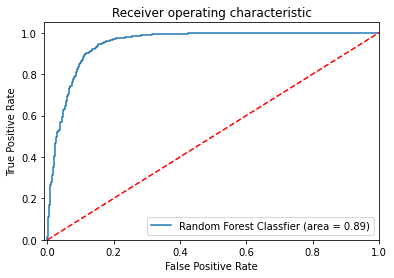

In [48]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, rf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest Classfier (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

### Feature importance with LOFO (Leave One Feature Out)

LOFO (Leave One Feature Out) Importance calculates the importances of a set of features based on a metric of choice, for a model of choice, by iteratively removing each feature from the set, and evaluating the performance of the model, with a validation scheme of choice, based on the chosen metric.

LOFO first evaluates the performance of the model with all the input features included, then iteratively removes one feature at a time, retrains the model, and evaluates its performance on a validation set. The mean and standard deviation (across the folds) of the importance of each feature is then reported.

LOFO has several advantages compared to other importance types:

* It does not favor granular features
* It generalises well to unseen test sets
* It is model agnostic
* It gives negative importance to features that hurt performance upon inclusion
* It can group the features. Especially useful for high dimensional features like TFIDF or OHE features.
* It can automatically group highly correlated features to avoid underestimating their importance.

In [49]:
!pip install lofo-importance

In [50]:
from sklearn.model_selection import KFold
from lofo import LOFOImportance, Dataset, plot_importance

/opt/conda/lib/python3.7/site-packages/lofo/lofo_importance.py:3: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


  0%|          | 0/19 [00:00<?, ?it/s]

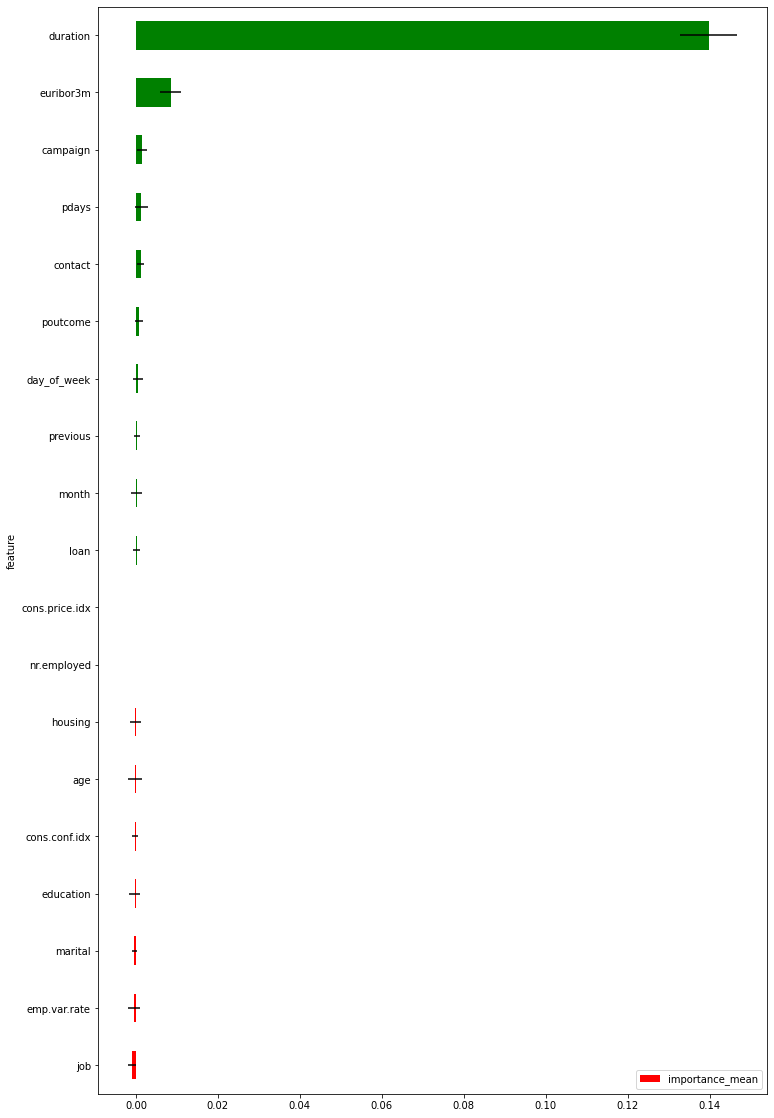

In [51]:

cv = KFold(n_splits=4, shuffle=True, random_state=0)

# define the binary target and the features
dataset = Dataset(df=balanced_df, target="y", features=[col for col in balanced_df.columns if col != "y"])

# define the validation scheme and scorer. The default model is LightGBM
lofo_imp = LOFOImportance(dataset, cv=cv, scoring="roc_auc")

# get the mean and standard deviation of the importances in pandas format
importance_df = lofo_imp.get_importance()

# plot the means and standard deviations of the importances
plot_importance(importance_df, figsize=(12, 20))